In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sklearn, sys
import scipy

In [7]:
import numpy as np

# reproducibility
np.random.seed(10)

# generate data
babies = range(10)
months = np.arange(13)
data = [(month, np.dot(month, 24.7) + 96 + np.random.normal(loc=0, scale=20))
        for month in months
        for baby in babies]
month_data = [element[0] for element in data]
weight_data = [element[1] for element in data]

In [8]:
X = np.array(month_data)
X = np.c_[np.ones(X.shape[0]), X] # little trick to add vector of 1's
y = np.array(weight_data)

In [9]:
def ols(X, y):
    '''returns parameters based on Ordinary Least Squares.'''
    xtx = np.dot(X.T, X) ## x-transpose times x
    inv_xtx = np.linalg.inv(xtx) ## inverse of x-transpose times x
    xty = np.dot(X.T, y) ## x-transpose times y
    return np.dot(inv_xtx, xty)

In [10]:
# find parameters
params = ols(X,y)
print('intercept: {} | slope: {}'.format(params[0], params[1]))

intercept: 97.94349022705876 | slope: 24.68016506543873


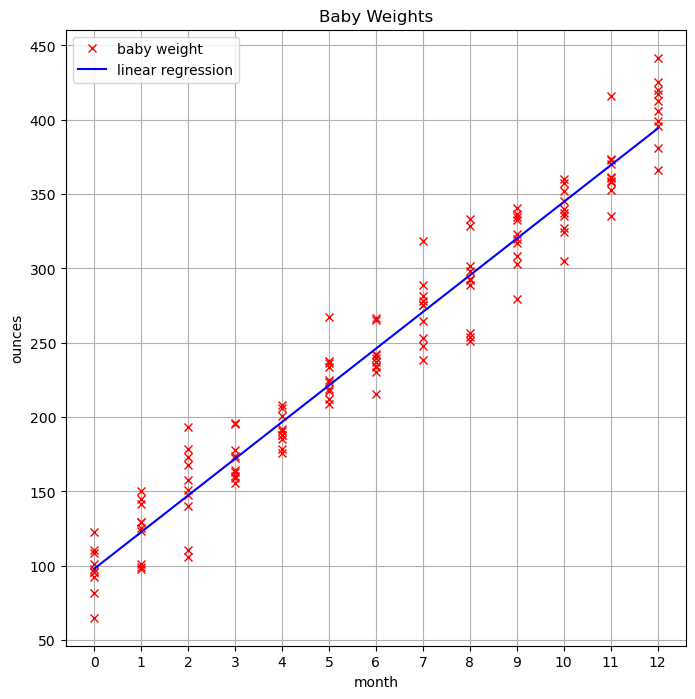

In [11]:
theta0 = params[0]
theta1 = params[1]
model = theta0 + np.dot(theta1, months)

plt.figure(figsize=(8,8))
plt.plot(month_data, weight_data, 'rx', label='baby weight')
plt.plot(months, model, 'b', label='linear regression')
plt.title('Baby Weights')
plt.xlabel('month')
plt.ylabel('ounces')
plt.xticks(months)
plt.legend()
plt.grid();

In [13]:
#Using sklearn

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X, y)
sklearn_params = np.array([lr.intercept_, lr.coef_[1]])
print(sklearn_params)

[97.94349023 24.68016507]


# Multivariate

In [14]:
gender = np.random.binomial(n=1, p=0.5, size=len(babies)*len(months)) ## male=0, female=1
X = np.c_[X, gender]

C:\Users\rajas\AppData\Local\Temp\ipykernel_44568\171952998.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=30, azim=110)
C:\Users\rajas\AppData\Local\Temp\ipykernel_44568\171952998.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.w_xaxis.set_ticklabels(months[::2])
C:\Users\rajas\AppData\Local\Temp\ipykernel_44568\171952998.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.w_yaxis.set_ticklabels(['male','','','','','female'])
C:\Users\rajas\AppData\Local\Temp\ipykernel_44568\171952998.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.w_zaxis.s

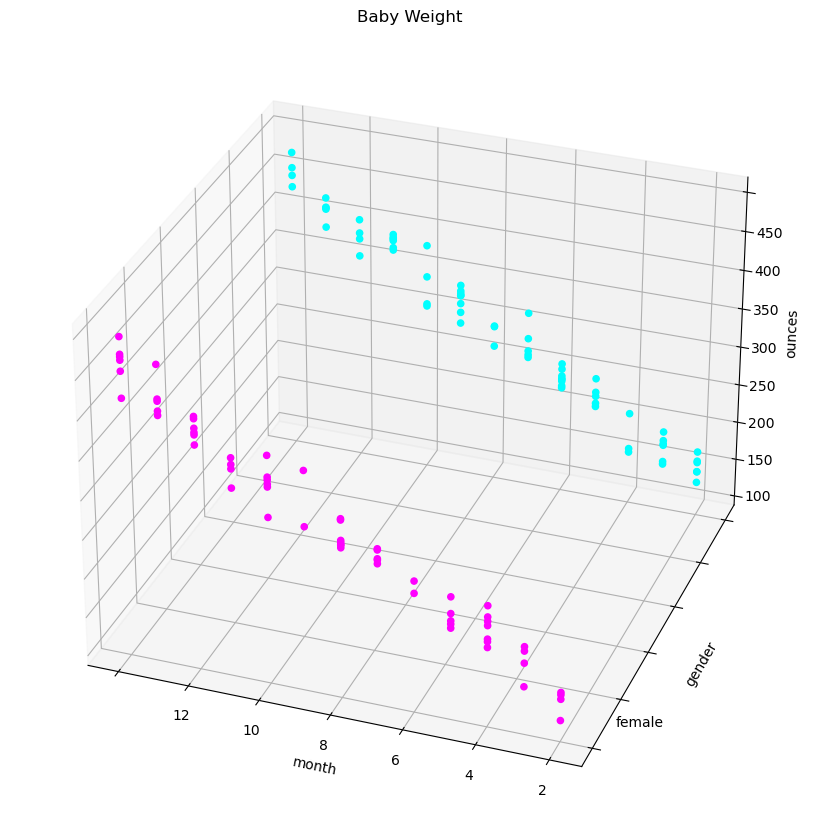

In [15]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, elev=30, azim=110)
ax.scatter(X[:, 1], X[:, 2], y, c=gender, cmap='cool', depthshade=False)
ax.set_title("Baby Weight")
ax.set_xlabel("month")
ax.w_xaxis.set_ticklabels(months[::2])
ax.set_ylabel("gender")
ax.w_yaxis.set_ticklabels(['male','','','','','female'])  
ax.set_zlabel("ounces")
ax.w_zaxis.set_ticklabels(range(50,500,50))

plt.show()

In [16]:
multivariate_params = ols(X,y)
print(multivariate_params)

[95.46395681 24.63320421  5.6979177 ]


C:\Users\rajas\AppData\Local\Temp\ipykernel_44568\153246981.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, elev=30, azim=110)
C:\Users\rajas\AppData\Local\Temp\ipykernel_44568\153246981.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.w_xaxis.set_ticklabels(months[::2])
C:\Users\rajas\AppData\Local\Temp\ipykernel_44568\153246981.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.w_yaxis.set_ticklabels(['male','','','','','female'])
C:\Users\rajas\AppData\Local\Temp\ipykernel_44568\153246981.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.w_zaxis.s

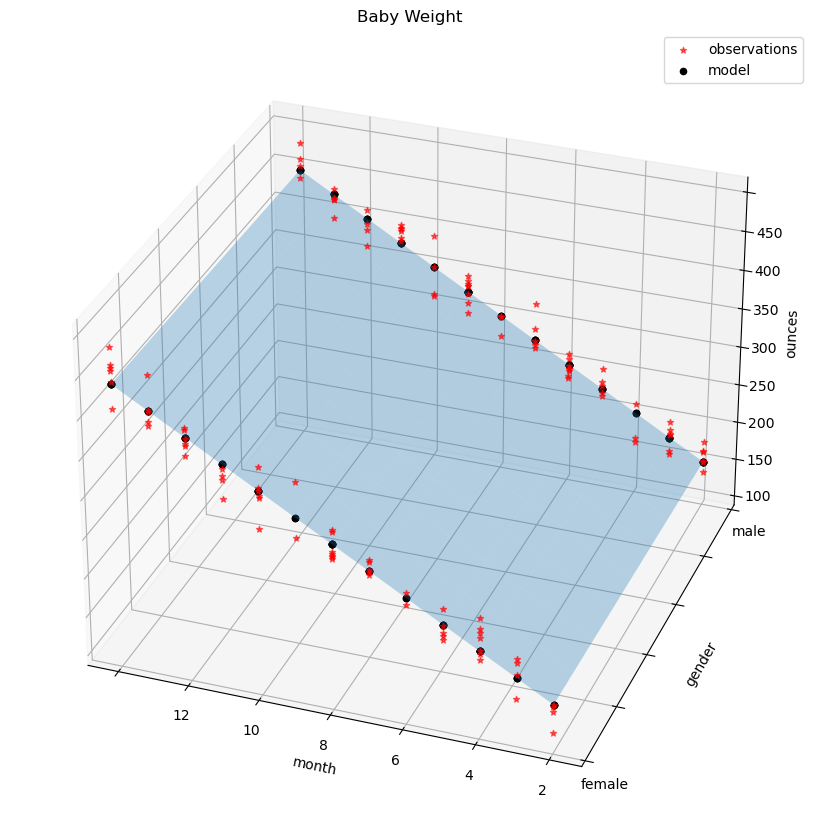

In [17]:
# model estimates
multi_model = np.dot(X, multivariate_params)

# setup
fig = plt.figure(1, figsize=(8, 8))
ax = Axes3D(fig, elev=30, azim=110)
ax.set_title("Baby Weight")
ax.set_xlabel("month")
ax.w_xaxis.set_ticklabels(months[::2])
ax.set_ylabel("gender")
ax.set_ylim3d(0, 1)
ax.w_yaxis.set_ticklabels(['male','','','','','female'])  
ax.set_zlabel("ounces")
ax.w_zaxis.set_ticklabels(range(50,500,50))

# scatter plots
scatter1 = ax.scatter(X[:,1], X[:,2], y, 
                      c='red', 
                      marker='*', 
                      depthshade=False,
                      label='observations',
                      alpha=0.6)
scatter2 = ax.scatter3D(X[:,1], X[:,2], multi_model, c='k', depthshade=False, label='model')

# plane plot
xs, ys = np.meshgrid(months, np.arange(0, 1.125, 0.125))
z = multivariate_params[0] + \
    np.dot(xs, multivariate_params[1]) + \
    np.dot(ys, multivariate_params[2])
ax.plot_surface(xs, ys, z, alpha=0.3, shade=False)

plt.legend(fancybox=True)

plt.show()